In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 15

## Online computation of mean

$$ 
\begin{align}
\bar{x}_t  {} & \overset{\text{def}}{=}  \frac{1}{t}\sum_{i=1}^{t}x_i  \\
\bar{x}_t {} & =  \frac{1}{t} \left( x_t + (t-1)\bar{x}_{t-1} \right) \\
\end{align}
$$

## Conjugate Priors


Let's model model the data as being iid with a Gaussian likelihood and parameterised by a mean $\mu$ and precision, $\tau = 1/\sigma^2$

$$ 
\begin{align}
x_i | \mu, \tau {} & \overset{iid}{\sim}  \mathcal{N}(\mu, \tau)  \\
\mu {} & \sim \mathcal{N}(\mu_0, \kappa_0\tau) \\
\tau {} & \sim \textsf{Gamma}(\alpha, \beta)
\end{align}
$$



Starting with parameters for $\mu_0$, $\kappa_0$, $\alpha$, $\beta$, the posterior mean and precision can be calculated as 
$$
\begin{align}
\mu | \tau, x \sim {} & \mathcal{N}\left( \frac{n}{n+n_0}\bar{x} +  \frac{\kappa_0}{n+\kappa_0}\mu_0 , (n +\kappa_0)\tau   \right) \\
\tau | x \sim  {} & \textsf{Ga}\left( \alpha + \frac{n}{2}, \beta + \frac{1}{2}\sum_i (x_i - \bar{x})^2 + \frac{n\kappa_0}{2(n + \kappa_0)}  (\bar{x} - \mu_0)^2  \right) 
\end{align}
$$

An alternative parameterisation is 

Unlike the more popular convention of using $ \mathcal{N}(\mu,\sigma^2)$, we will deal with the alternative parametrisation of the normal distribution using the precision $\tau = 1/\sigma^2$, i.e. $ \mathcal{N}(\mu, \tau)$ 

$$ 
\begin{align}
x_i | \mu, \tau {} & \overset{iid}{\sim}  \mathcal{N}(\mu=\tilde{\mu}, \tau=\tilde{\tau})  \\
\tilde{\mu} {} & \sim  \textsf{Student-T}_{2\alpha_0}(\mu=\mu_0, \tau=\kappa_0 \alpha_0 / \beta_0) \\
\tilde{\tau} {} & \sim \textsf{Gamma}(\alpha_0, \beta_0)
\end{align}
$$







## Online Updates of Conjugate Priors


\begin{align*}
\kappa_t = {} & \kappa_{t-1} + 1 \\
\mu_t = {} & \frac{1}{\kappa_t}  \left(  x_t + \kappa_{t-1} \mu_{t-1}  \right) \\
\alpha_t = {} & \alpha_{t-1} + 1/2  \\
\beta_t = {} & \beta_{t-1} + \frac{\kappa_t (x_t - \mu_t)^2 }{2 (\kappa_t + 1)} \\
   x | \mu_t, \tau_t  \sim {} & \textsf{Student-T}_{2\alpha_t} \left(\mu=\mu_t, \tau= \frac{\alpha_t \kappa_t}{\beta_t(\kappa_t + 1)}   \right)
\end{align*}

In [9]:
n_samp = 50000
_alpha0 = 1
_beta0 = 2


precision = _alpha0/_beta0
variance = 1/precision
std_dev = np.sqrt(variance)

x = stats.t.rvs(size=n_samp, df=100, loc=0, scale=std_dev)
print("Theoretical_variance", variance, "sample variance", np.var(x))

Theoretical_variance 2.0 sample variance 2.048124998500413


## Message Parsing

In [325]:
data = [1, 2, 3, 4]
n = len(data)
print("Num Data Points=", n, "Sum=", np.sum(data), "Mean=", np.mean(data))


# [1, 2, 3, 4]
#    [2, 3, 4] 
#        [3, 4]

# t1, t2, t3, t4
# 1, 3, 6, 10
#    2, 5, 9
#       3, 7

Num Data Points= 4 Sum= 10 Mean= 2.5


<IPython.core.display.Javascript object>

In [321]:
sample_sum = np.zeros([n + 1, n + 1])
counter = np.zeros([n + 1, n + 1])

time = 0
time_list = []
sample_mean[0, :] = 0


for t in range(1, n + 1):
    x_t = data[t - 1]

    counter[1 : t + 1, t] = counter[:t, t - 1] + 1
    sample_sum[1 : t + 1, t] = sample_sum[:t, t - 1] + x_t

print(sample_sum)

[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  0.  3.  5.  7.]
 [ 0.  0.  0.  6.  9.]
 [ 0.  0.  0.  0. 10.]]


<IPython.core.display.Javascript object>

In [322]:
sample_mean = np.zeros([n + 1, n + 1])


for t in range(1, n + 1):
    x_t = data[t - 1]

    counter[1 : t + 1, t] = counter[:t, t - 1] + 1

    sample_mean[1 : t + 1, t] = (1 / counter[1 : t + 1, t]) * (
        x_t + (counter[1 : t + 1, t] - 1) * sample_mean[:t, t - 1]
    )

print(sample_mean)

[[0.  0.  0.  0.  0. ]
 [0.  1.  2.  3.  4. ]
 [0.  0.  1.5 2.5 3.5]
 [0.  0.  0.  2.  3. ]
 [0.  0.  0.  0.  2.5]]


<IPython.core.display.Javascript object>

In [231]:
data_time = np.append(
    stats.norm.rvs(size=50, loc=1, scale=0.1),
    stats.norm.rvs(size=50, loc=3, scale=0.1),
)

<IPython.core.display.Javascript object>

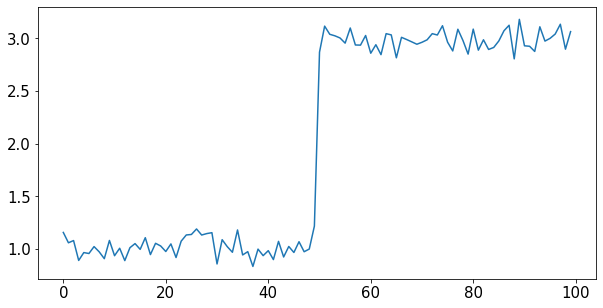

<IPython.core.display.Javascript object>

In [232]:
plt.plot(data_time)
plt.show()

In [ ]:
data = [1, 2, 3, 4]

T = len(data)

R = np.zeros([T+1, T+1])
prob_data = np.zeros([T+1, T+1])
mu = np.zeros([T+1, T+1])
tau = np.ones([T+1, T+1])
update_vec = np.zeros([T+1, T+1])


TIME =  np.zeros([T+1, T+1])
# TIME[0, 1] = 1

H = 1 / 60

across = {"rows": 0, "columns": 1}


for t in range(1, T+1):
    x = data[t-1]
    
#     prob_data[:, t] = stats.norm.pdf(x=x, loc=mu[:, t], scale=1/tau[:, t])

#     # Update Run Length P
#     R[1:t+1, t+1] = R[0:t, t] * prob_data * H  # element wise multiplication
    
#     R[0, t+1] = np.sum(R[1:t, t] * prob_data  * (1 - H))
    
#     # Normalise to get valid probabilities     
#     R[:, t+1] = R[:, t+1] / R.sum(axis=across["rows"])
#     TIME[1:T+1, t+1] =  TIME[0:T, t]
    TIME[1:t+1, t] =  TIME[0:t, t-1] + x
    
    print(TIME[:, t])
#     mu[1:t, t+1], = mu[1:t, t+1] 
    
    


In [ ]:
# I want to look at R


A = np.array([[1, 2, 3], [2, 5, 99]])
print(A)

A / A.sum(axis=across["rows"])


In [ ]:
?stats.norm.pdf

In [ ]:
x = 0.5


In [170]:
data = np.array([1, 2, 4, 6])



<IPython.core.display.Javascript object>

In [171]:
def update_param_vtau(data: np.array) -> None:

    mu0 = 3
    n0 = 1
    alpha = 10
    beta = 1

    tau_mean_prior = alpha / beta

    print(f"Prior mean, mu0 {mu0}", f"Prior precision, tau0 {tau_mean_prior: .2f}")

    n = len(data)
    data_bar = np.mean(data)
    tau_x = 1 / np.var(data)

    print("")
    print(f"Sample mean, x_bar {data_bar}", f"Sample precision, tau_x {tau_x: .2f}")

    alpha_post = alpha + n / 2
    beta_post = (
        beta
        + 0.5 * np.sum((data - data_bar) ** 2)
        + 0.5 * n * n0 / (n + n0) * (data_bar - mu0) ** 2
    )
    tau_mean_post = alpha_post / beta_post

    mu_mean_post = (n / (n + n0)) * data_bar + (n0 / (n + n0)) * mu0

    print("---")
    print(
        f"Posterior mean, {mu_mean_post: .2f}",
        f"Posterior precision, {tau_mean_post: .2f}",
    )

    pass


update_param_vtau(data)

Prior mean, mu0 3 Prior precision, tau0  10.00

Sample mean, x_bar 3.25 Sample precision, tau_x  0.27
---
Posterior mean,  3.20 Posterior precision,  1.43


<IPython.core.display.Javascript object>

In [172]:
def update_param_reparam(data: np.array) -> None:

    mu0 = 3
    kappa0 = 1
    alpha = 10
    beta = 1

    tau_mean_prior = alpha / beta

    print(f"Prior mean, mu0 {mu0}", f"Prior precision, tau0 {tau_mean_prior: .2f}")

    n = len(data)
    data_bar = np.mean(data)
    tau_x = 1 / np.var(data)

    print("")
    print(f"Sample mean, x_bar {data_bar}", f"Sample precision, tau_x {tau_x: .2f}")

    alpha_post = alpha + n / 2
    beta_post = (
        beta
        + 0.5 * np.sum((data - data_bar) ** 2)
        + 0.5 * (n * kappa0 / (n + kappa0)) * (data_bar - mu0) ** 2
    )
    tau_mean_post = alpha_post / beta_post

    kappa_post = kappa0 + n
    mu_mean_post = (n / (n + kappa0)) * data_bar + (kappa0 / (n + kappa0)) * mu0

    print("---")
    print(
        f"Posterior mean, {mu_mean_post: .2f}",
        f"Posterior precision, {tau_mean_post: .2f}",
    )

    pass


update_param_reparam(data)

Prior mean, mu0 3 Prior precision, tau0  10.00

Sample mean, x_bar 3.25 Sample precision, tau_x  0.27
---
Posterior mean,  3.20 Posterior precision,  1.43


<IPython.core.display.Javascript object>

In [ ]:
t0 = 1


online_mu = np.zeros(n + 1)
online_alpha = np.zeros(n + 1)
online_beta = np.zeros(n + 1)
online_tau = np.zeros(n + 1)


online_s = np.zeros(n + 1)
online_t = np.zeros(n + 1)


online_mu[0] = 3
online_alpha[0] = 10
online_beta[0] = 1
sample_mean = 0
for t in range(n):

    x = data[t]
    # Keeping track of time
    T = t0 + t + 1
    online_mu[t + 1] = (1 /T) * (x + (T - 1) * online_mu[t])

    sample_mean = (1 / (t + 1)) * (x + (t + 1 - 1) * sample_mean)
    print(x, sample_mean)

    online_alpha[t + 1] = online_alpha[t] + 0.5

    online_s[t + 1] = online_s[t] + x ** 2

    online_beta[t + 1] = (
        online_beta[0]
        + 0.5 * (online_s[t + 1] - (t + 1) * (sample_mean ** 2))
        + 0.5 * ((t + 1) * t0 / (t + 1 + t0)) * ((sample_mean - mu0) ** 2)
    )

    online_tau[t + 1] = online_alpha[t + 1] / online_beta[t + 1]

In [33]:
print(np.sum(data))

sample_mean = np.zeros([n + 1, n + 1])
sample_sum = np.zeros([n + 1, n + 1])
counter = np.zeros([n + 1, n + 1])


time = 0
time_list = []
sample_mean[0, :] = 0


for t in range(1, n + 1):
    x_t = data[t - 1]

    counter[1 : t + 1, t] = counter[:t, t - 1] + 1

    sample_mean[1 : t + 1, t] = (1 / counter[1 : t + 1, t]) * (
        x_t + (counter[1 : t + 1, t] - 1) * sample_mean[:t, t - 1]
    )

#     sample_sum[1 : t + 1, t] = sample_sum[:t, t - 1] + x_t

print(data)
print(counter)

13
[1 2 4 6]
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1.]
 [0. 0. 2. 2. 2.]
 [0. 0. 0. 3. 3.]
 [0. 0. 0. 0. 4.]]


<IPython.core.display.Javascript object>

In [145]:
data

array([  1,   2,   4, -60])

<IPython.core.display.Javascript object>


\begin{align*}
\kappa_t = {} & \kappa_{t-1} + 1 \\
\mu_t = {} & \frac{1}{\kappa_t}  \left(  x_t + \kappa_{t-1} \mu_{t-1}  \right) \\
\alpha_t = {} & \alpha_{t-1} + 1/2  \\
\beta_t = {} & \beta_{t-1} + \frac{\kappa_t (x_t - \mu_t)^2 }{2 (\kappa_t + 1)} \\
    p(x) = {} & \textsf{Student-T}_{2\alpha_t} \left(\mu=\mu_t, \lambda= \frac{\alpha_t \kappa_t}{\beta_t(\kappa_t + 1)}   \right)
\end{align*}

In [266]:
n = len(data_time)

mu = np.zeros([n + 1, n + 1])
kappa = np.zeros([n + 1, n + 1])
alpha = np.zeros([n + 1, n + 1])
beta = np.zeros([n + 1, n + 1])
tau = np.zeros([n + 1, n + 1])
deg_f = np.zeros([n + 1, n + 1])
pis = np.zeros([n + 1, n + 1])
R = np.zeros([n + 1, n + 1])
alt_R = np.zeros([n + 1, n + 1])

mu0 = 3
kappa0 = 1
alpha0 = 10
beta0 = 1


mu[0, :] = mu0
kappa[0, :] = kappa0
alpha[0, :] = alpha0
beta[0, :] = beta0
tau[0, :] = alpha[0, :] / beta[0, :]
deg_f[0, :] = 2 * alpha0
R[0, 0] = 1
H = 1 / 20

time = 0
time_list = []


for t in range(1, n + 1):
    x_t = data_time[t - 1]

    pis[:t, t] = stats.t.pdf(
        x=x_t,
        df=deg_f[:t, t - 1],
        loc=mu[:t, t - 1],
        scale=np.sqrt(
            beta[:t, t - 1]
            * (kappa[:t, t - 1] + 1)
            / (alpha[:t, t - 1] * kappa[:t, t - 1])
        ),
    )
    alt_R[:t, t] = pis[:t, t] / np.sum(pis[:t, t])
    R[1 : t + 1, t] = R[:t, t - 1] * pis[:t, t] * (1 - H)
    R[0, t] = np.sum(R[:t, t - 1] * pis[:t, t] * H)
    R[:, t] = R[:, t] / np.sum(R[:, t])

    # Update Params
    kappa[1 : t + 1, t] = 1 + kappa[:t, t - 1]

    mu[1 : t + 1, t] = (1 / kappa[1 : t + 1, t]) * (
        x_t + kappa[0:t, t - 1] * mu[:t, t - 1]
    )

    alpha[1 : t + 1, t] = 0.5 + alpha[:t, t - 1]

    beta[1 : t + 1, t] = (
        beta[:t, t - 1]
        + 0.5 * kappa[:t, t - 1] / (kappa[:t, t - 1] + 1) * (x_t - mu[:t, t - 1]) ** 2
    )

    tau[:, t] = alpha[:, t] / beta[:, t]

    deg_f[:, t] = 2 * alpha[:, t]


df_R = pd.DataFrame(R)
df_alt_R = pd.DataFrame(alt_R)

/opt/anaconda3/envs/homework/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>

In [233]:
# https://github.com/hildensia/bayesian_changepoint_detection/blob/master/bayesian_changepoint_detection/online_changepoint_detection.py
from functools import partial


def online_changepoint_detection(data, hazard_func, observation_likelihood):
    maxes = np.zeros(len(data) + 1)

    R = np.zeros((len(data) + 1, len(data) + 1))
    R[0, 0] = 1

    for t, x in enumerate(data):
        # Evaluate the predictive distribution for the new datum under each of
        # the parameters.  This is the standard thing from Bayesian inference.
        predprobs = observation_likelihood.pdf(x)

        # Evaluate the hazard function for this interval
        H = hazard_func(np.array(range(t + 1)))

        # Evaluate the growth probabilities - shift the probabilities down and to
        # the right, scaled by the hazard function and the predictive
        # probabilities.
        R[1 : t + 2, t + 1] = R[0 : t + 1, t] * predprobs * (1 - H)

        # Evaluate the probability that there *was* a changepoint and we're
        # accumulating the mass back down at r = 0.
        R[0, t + 1] = np.sum(R[0 : t + 1, t] * predprobs * H)

        # Renormalize the run length probabilities for improved numerical
        # stability.
        R[:, t + 1] = R[:, t + 1] / np.sum(R[:, t + 1])

        # Update the parameter sets for each possible run length.
        observation_likelihood.update_theta(x)

        maxes[t] = R[:, t].argmax()
    return R, maxes


def constant_hazard(lam, r):
    return 1 / lam * np.ones(r.shape)


class StudentT:
    def __init__(self, alpha, beta, kappa, mu):
        self.alpha0 = self.alpha = np.array([alpha])
        self.beta0 = self.beta = np.array([beta])
        self.kappa0 = self.kappa = np.array([kappa])
        self.mu0 = self.mu = np.array([mu])

    def pdf(self, data):
        return stats.t.pdf(
            x=data,
            df=2 * self.alpha,
            loc=self.mu,
            scale=np.sqrt(self.beta * (self.kappa + 1) / (self.alpha * self.kappa)),
        )

    def update_theta(self, data):
        muT0 = np.concatenate(
            (self.mu0, (self.kappa * self.mu + data) / (self.kappa + 1))
        )
        kappaT0 = np.concatenate((self.kappa0, self.kappa + 1.0))
        alphaT0 = np.concatenate((self.alpha0, self.alpha + 0.5))
        betaT0 = np.concatenate(
            (
                self.beta0,
                self.beta
                + (self.kappa * (data - self.mu) ** 2) / (2.0 * (self.kappa + 1.0)),
            )
        )

        self.mu = muT0
        self.kappa = kappaT0
        self.alpha = alphaT0
        self.beta = betaT0

<IPython.core.display.Javascript object>

In [234]:
H_f = partial(constant_hazard, 1 / H)
obs_likelihood = StudentT(alpha=alpha0, beta=beta0, kappa=kappa0, mu=mu0)

R_hat, max_hat = online_changepoint_detection(
    data=data_time, hazard_func=H_f, observation_likelihood=obs_likelihood
)

<IPython.core.display.Javascript object>

In [235]:
df_R_hat = pd.DataFrame(R_hat)

<IPython.core.display.Javascript object>

In [255]:
def plot_(R, data):
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=[18, 16])
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(data)
    ax = fig.add_subplot(2, 1, 2, sharex=ax)
    sparsity = 1  # only plot every fifth data for faster display
    ax.pcolor(
        np.array(range(0, len(R[:, 0].round(2)), sparsity)),
        np.array(range(0, len(R[:, 0].round(2)), sparsity)),
        np.log(R),
        cmap=cm.Greys, vmin=-30, vmax=0
    )
    return fig


<IPython.core.display.Javascript object>

/opt/anaconda3/envs/homework/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


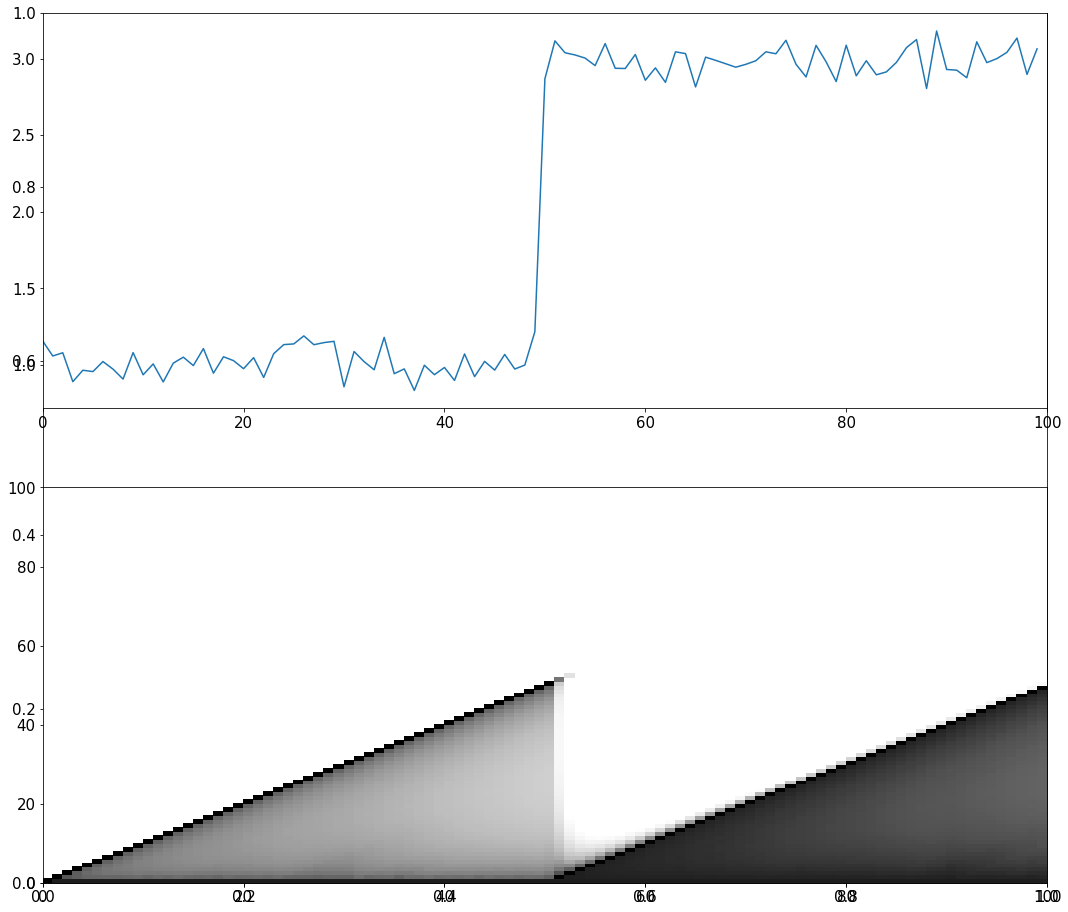

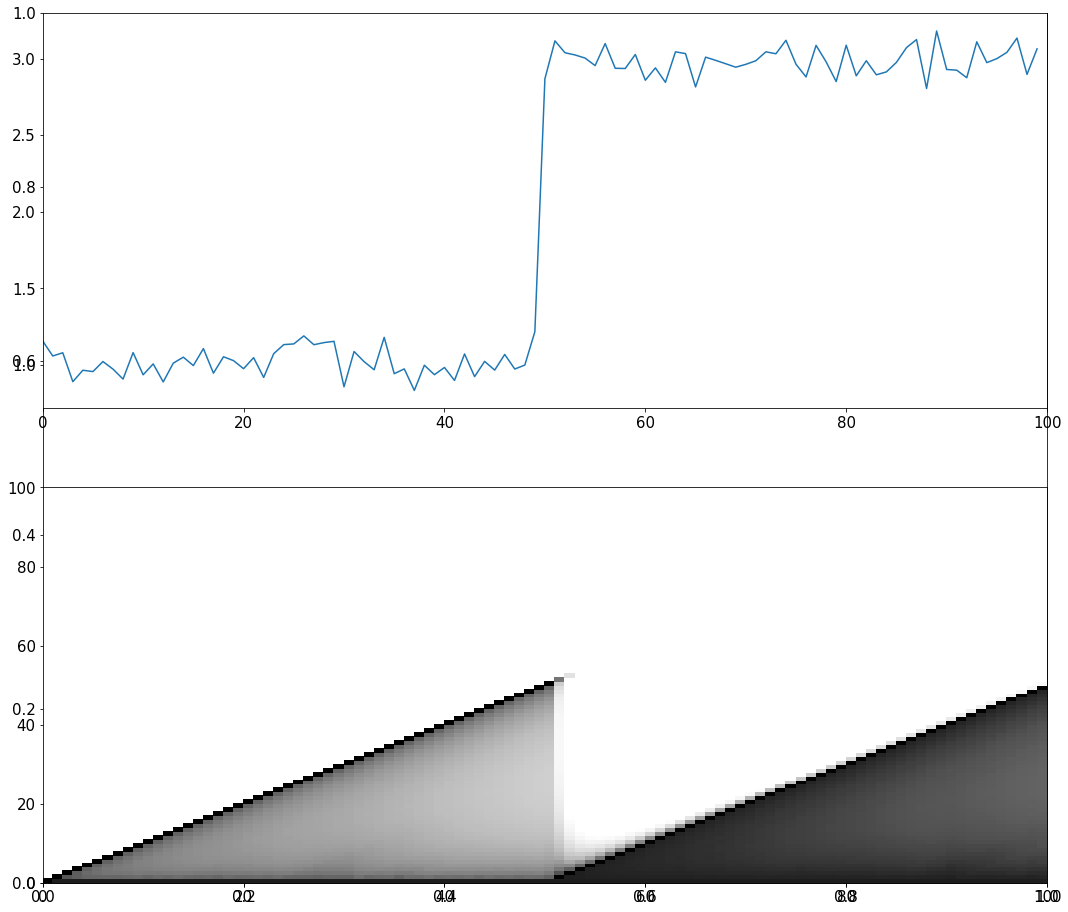

<IPython.core.display.Javascript object>

In [256]:
plot_(R=R_hat, data=data_time)

In [252]:
df_R_hat.iloc[[0, 1, 2, 3, 4, 5, 48, 49, 50, 51, 52], 45:55].round(2)

,45,46,47,48,49,50,51,52,53,54
0,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
1,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.04,0.04,0.04
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.04,0.03
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.87,0.04
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
48,0.00,0.00,0.00,0.95,0.00,0.00,0.00,0.00,0.00,0.00
49,0.00,0.00,0.00,0.00,0.95,0.00,0.00,0.00,0.00,0.00
50,0.00,0.00,0.00,0.00,0.00,0.95,0.00,0.00,0.00,0.00
51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

In [267]:
pd.DataFrame(pis).iloc[[0, 1, 2, 3, 4, 5, 48, 49, 50, 51, 52], 45:55].round(2)

,45,46,47,48,49,50,51,52,53,54
0,0.00,0.00,0.00,0.00,0.00,0.00,0.84,0.85,0.88,0.88
1,0.17,0.12,0.18,0.11,0.14,0.25,0.25,0.92,1.04,1.04
2,0.36,0.32,0.39,0.31,0.32,0.52,0.08,0.25,1.12,1.13
3,0.51,0.44,0.55,0.44,0.47,0.64,0.04,0.10,0.49,1.19
4,0.60,0.55,0.62,0.54,0.56,0.72,0.02,0.05,0.26,0.60
5,0.67,0.61,0.69,0.60,0.63,0.77,0.01,0.03,0.16,0.36
48,0.00,0.00,0.00,0.00,1.28,1.12,0.00,0.00,0.00,0.00
49,0.00,0.00,0.00,0.00,0.00,1.13,0.00,0.00,0.00,0.00
50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

In [269]:
df_alt_R.iloc[[0, 1, 2, 3, 4, 5, 48, 49, 50, 51, 52], 45:55].round(2)

,45,46,47,48,49,50,51,52,53,54
0,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.37,0.19,0.13
1,0.00,0.00,0.00,0.00,0.00,0.01,0.20,0.40,0.23,0.16
2,0.01,0.01,0.01,0.01,0.01,0.01,0.06,0.11,0.24,0.17
3,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.04,0.11,0.18
4,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.06,0.09
5,0.02,0.01,0.02,0.01,0.01,0.02,0.01,0.02,0.04,0.05
48,0.00,0.00,0.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00
49,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00
50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

/opt/anaconda3/envs/homework/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


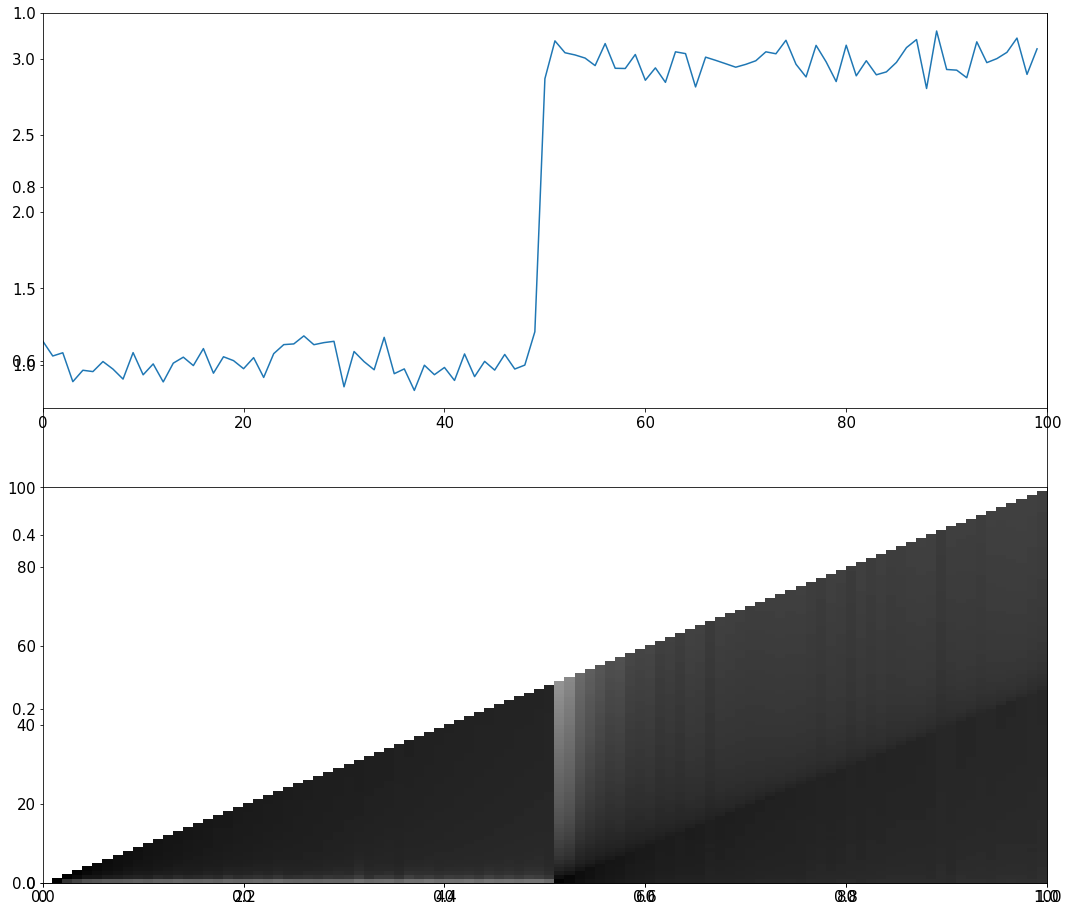

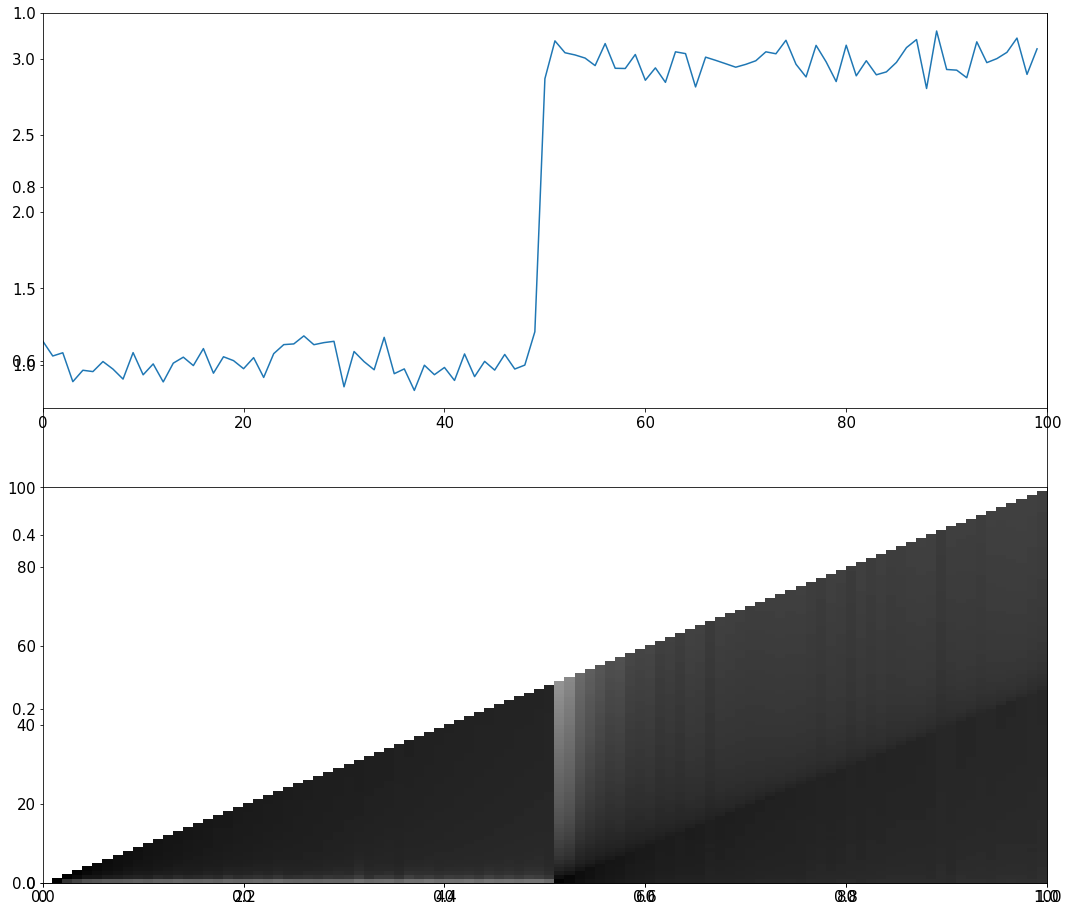

<IPython.core.display.Javascript object>

In [271]:
plot_(R=alt_R, data=data_time)

In [250]:
pd.DataFrame(data_time).T.iloc[:, 45:55].round(2)

,45,46,47,48,49,50,51,52,53,54
0,0.97,1.07,0.97,1.0,1.22,2.87,3.12,3.04,3.02,3.0


<IPython.core.display.Javascript object>

In [272]:
df_alt_R

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.0,1.0,0.0071,0.001887,0.000562,0.000361,0.000241,0.000229,0.000155,0.000100,...,0.010332,0.010050,0.009991,0.010922,0.009332,0.009182,0.009212,0.010197,0.008784,0.008787
1,0.0,0.0,0.9929,0.313320,0.127342,0.108012,0.063106,0.052769,0.034569,0.028464,...,0.011238,0.011999,0.011976,0.011962,0.010790,0.010863,0.010888,0.012068,0.009606,0.010005
2,0.0,0.0,0.0000,0.684794,0.361154,0.225901,0.170051,0.124997,0.093775,0.071752,...,0.012995,0.012339,0.013044,0.012669,0.011919,0.011738,0.011772,0.012910,0.010370,0.011205
3,0.0,0.0,0.0000,0.000000,0.510943,0.310131,0.223018,0.176565,0.134841,0.107589,...,0.013332,0.013429,0.012876,0.013163,0.012604,0.012383,0.012513,0.013381,0.011047,0.011862
4,0.0,0.0,0.0000,0.000000,0.000000,0.355595,0.261286,0.199732,0.165566,0.132037,...,0.013724,0.013662,0.013870,0.014505,0.013139,0.012876,0.012862,0.014201,0.011645,0.012340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002298,0.002411,0.002783,0.002312
97,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002382,0.002755,0.002285
98,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002730,0.002258
99,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002234


<IPython.core.display.Javascript object>

In [288]:
kap0 = 1
online_mu = np.zeros(n + 1)


online_mu[0] = 0

for t in range(1, n+1):
    x = data_time[t-1]
    # Keeping track of time
    T = kap0 + t + 1
    online_mu[t] = (1 /T) * (x + (T - 1) * online_mu[t-1])
    





<IPython.core.display.Javascript object>

In [289]:
online_mu

array([0.        , 0.38570467, 0.55401956, 0.65921595, 0.69790997,
       0.73619795, 0.76381668, 0.79258517, 0.81064972, 0.81951802,
       0.84130928, 0.84860858, 0.85993697, 0.86192434, 0.87131514,
       0.88190137, 0.88825894, 0.89978351, 0.90213388, 0.90936123,
       0.91478362, 0.9174472 , 0.92289013, 0.92273341, 0.92855839,
       0.93613624, 0.9433395 , 0.95184742, 0.95787344, 0.96395039,
       0.96991364, 0.96651869, 0.97009994, 0.97158261, 0.97151306,
       0.97716647, 0.97627884, 0.97623752, 0.97268883, 0.97332368,
       0.97245504, 0.97272531, 0.97105906, 0.97331043, 0.97224335,
       0.97334194, 0.97320698, 0.97516203, 0.97513726, 0.97561657,
       0.98026316, 1.01589215, 1.05477593, 1.09083766, 1.12535464,
       1.15830172, 1.18926651, 1.22161776, 1.25020299, 1.27782784,
       1.30603681, 1.33067963, 1.35581489, 1.378725  , 1.40395882,
       1.42826521, 1.44865897, 1.47127847, 1.49295433, 1.51370782,
       1.53357011, 1.55314299, 1.5725033 , 1.59212534, 1.61106

<IPython.core.display.Javascript object>

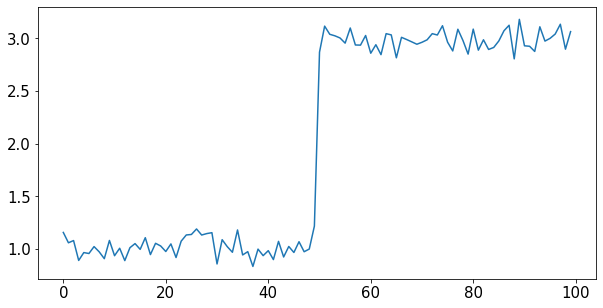

<IPython.core.display.Javascript object>

In [286]:
plt.plot(data_time)

In [285]:
np.mean(data_time)

2.0018932660621487

<IPython.core.display.Javascript object>

In [290]:
stats.norm.pdf(x, loc=, scale=0.1)

<IPython.core.display.Javascript object>

In [300]:
n = len(data_time)

bf_mu = np.zeros(n+1)
bf_kappa = np.zeros(n+1)
bf_alpha = np.zeros(n+1)
bf_beta = np.zeros(n+1)
bf_tau = np.zeros(n+1)
bf_deg_f = np.zeros(n+1)
bf_pis = np.zeros(n+1)
bf_pis0 =  np.zeros(n+1)

mu0 = 3
kappa0 = 1
alpha0 = 10
beta0 = 1


bf_mu[0] = mu0
bf_kappa[0] = kappa0
bf_alpha[0] = alpha0
bf_beta[0] = beta0
bf_tau[0] = bf_alpha[0] / bf_beta[0]
bf_deg_f[0] = 2 * alpha0





for t in range(1, n + 1):
    x_t = data_time[t - 1]

    bf_pis[t] = stats.t.pdf(
        x=x_t,
        df=bf_deg_f[t - 1],
        loc=bf_mu[t - 1],
        scale=np.sqrt(
            bf_beta[t - 1]
            * (bf_kappa[t - 1] + 1)
            / (bf_alpha[t - 1] * bf_kappa[t - 1])
        ),
    )
    
    bf_pis0[t] = stats.t.pdf(
        x=x_t,
        df=bf_deg_f[0],
        loc=bf_mu[0],
        scale=np.sqrt(
            bf_beta[0]
            * (bf_kappa[0] + 1)
            / (bf_alpha[0] * bf_kappa[0])
        ),
    )
    

    # Update Params
    bf_kappa[t] = 1 + bf_kappa[t - 1]

    bf_mu[t] = (1 / bf_kappa[t]) * (
        x_t + bf_kappa[t - 1] * bf_mu[t - 1]
    )

    bf_alpha[t] = 0.5 + bf_alpha[t - 1]

    bf_beta[t] = (
        bf_beta[t - 1]
        + 0.5 * bf_kappa[t - 1] / (bf_kappa[t - 1] + 1) * (x_t - bf_mu[t - 1]) ** 2
    )

    bf_tau[t] = bf_alpha[t] / bf_beta[t]

    bf_deg_f[t] = 2 * bf_alpha[t]




<IPython.core.display.Javascript object>

/opt/anaconda3/envs/homework/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


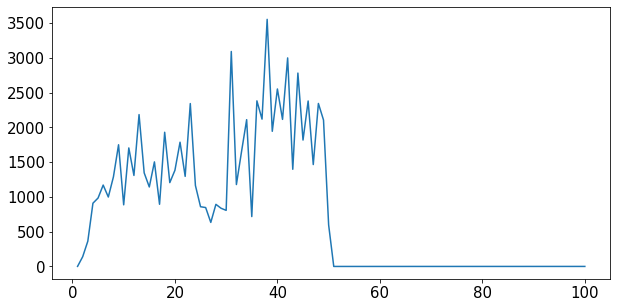

<IPython.core.display.Javascript object>

In [302]:
plt.plot(bf_pis / bf_pis0)
plt.show()

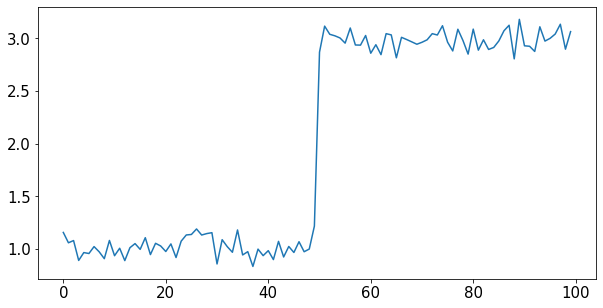

<IPython.core.display.Javascript object>

In [303]:
plt.plot(data_time)
plt.show()

In [312]:
bayes_f = pd.DataFrame(bf_pis / bf_pis0)
bayes_f.T.iloc[:, 45:55]

/opt/anaconda3/envs/homework/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


,45,46,47,48,49,50,51,52,53,54
0,1817.600128,2379.329499,1465.296582,2343.806597,2105.532417,597.228351,6.306225e-07,0.000004,0.000196,0.001137


<IPython.core.display.Javascript object>

In [314]:
pd.DataFrame(data_time).T.iloc[:, 45:55]

,45,46,47,48,49,50,51,52,53,54
0,0.966864,1.069004,0.973924,0.999582,1.217239,2.8686,3.115616,3.038171,3.023788,3.003338


<IPython.core.display.Javascript object>

In [316]:
chapters = pd.read_clipboard()

ParserError: Expected 5 fields in line 5, saw 6. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

<IPython.core.display.Javascript object>